In [ ]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

In [5]:
data = sc.read("../4_diff_gene_analysis/diff_gene_data.h5ad")

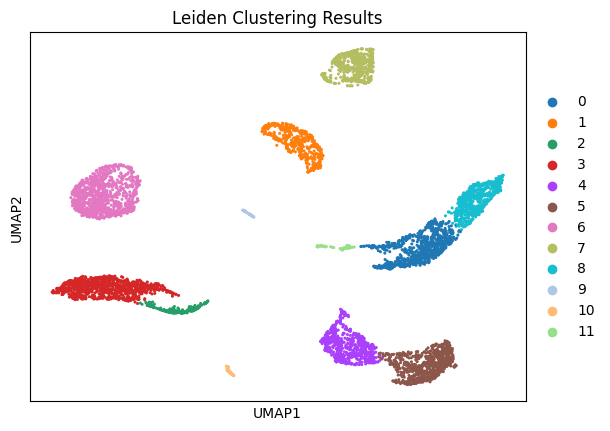

In [6]:
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results') #so we can compare group locations

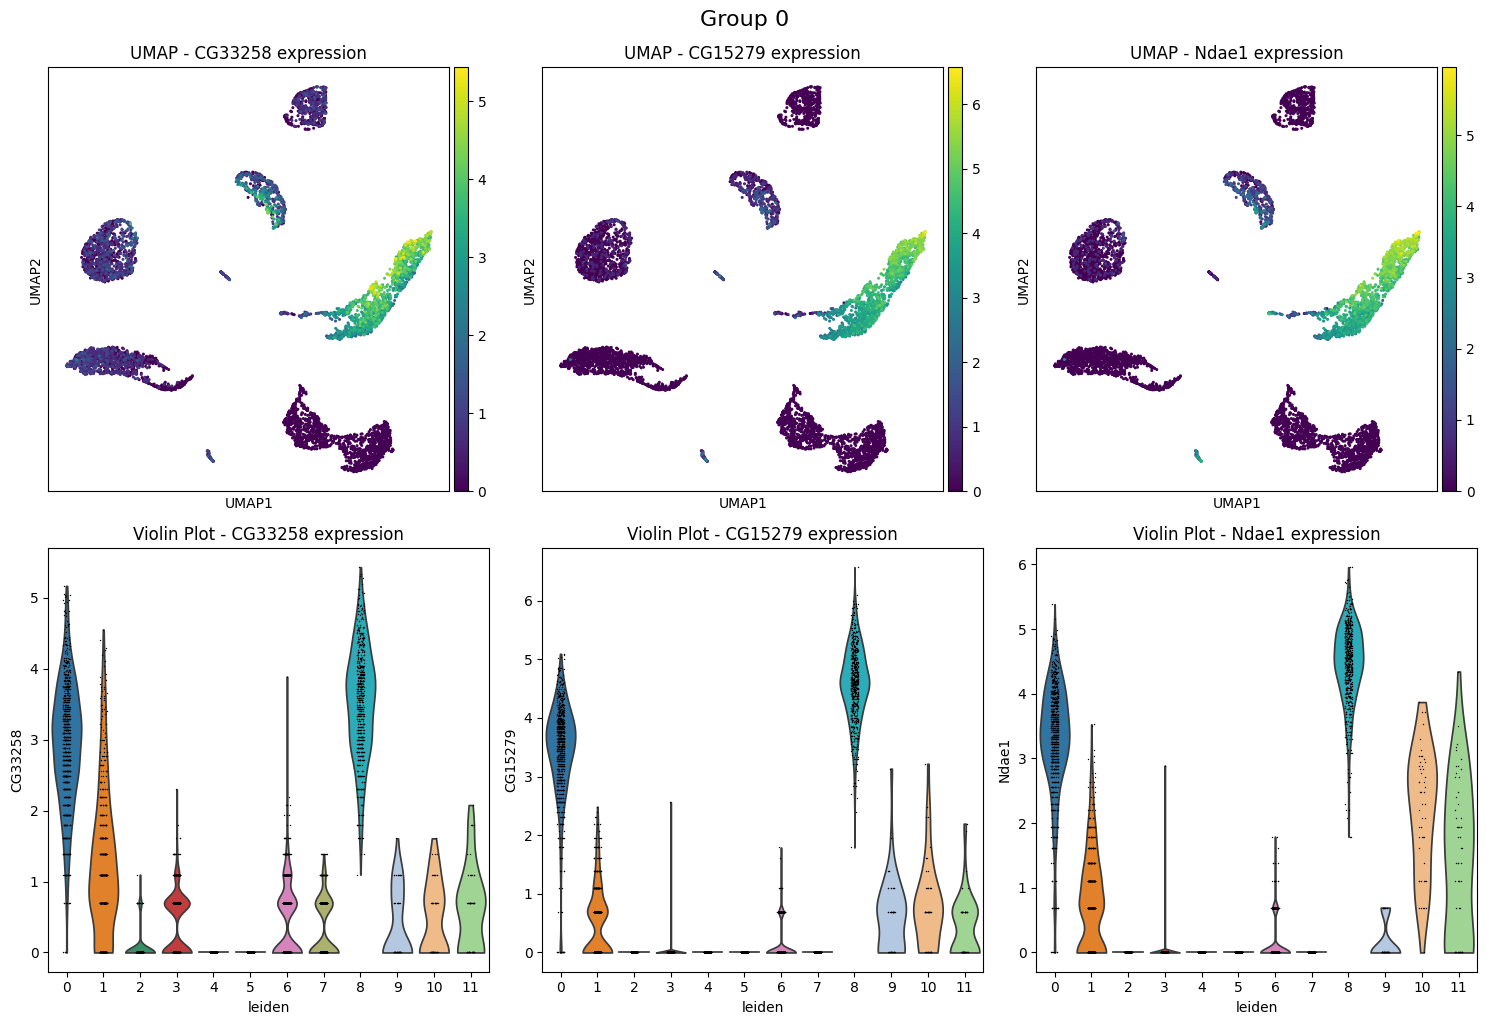

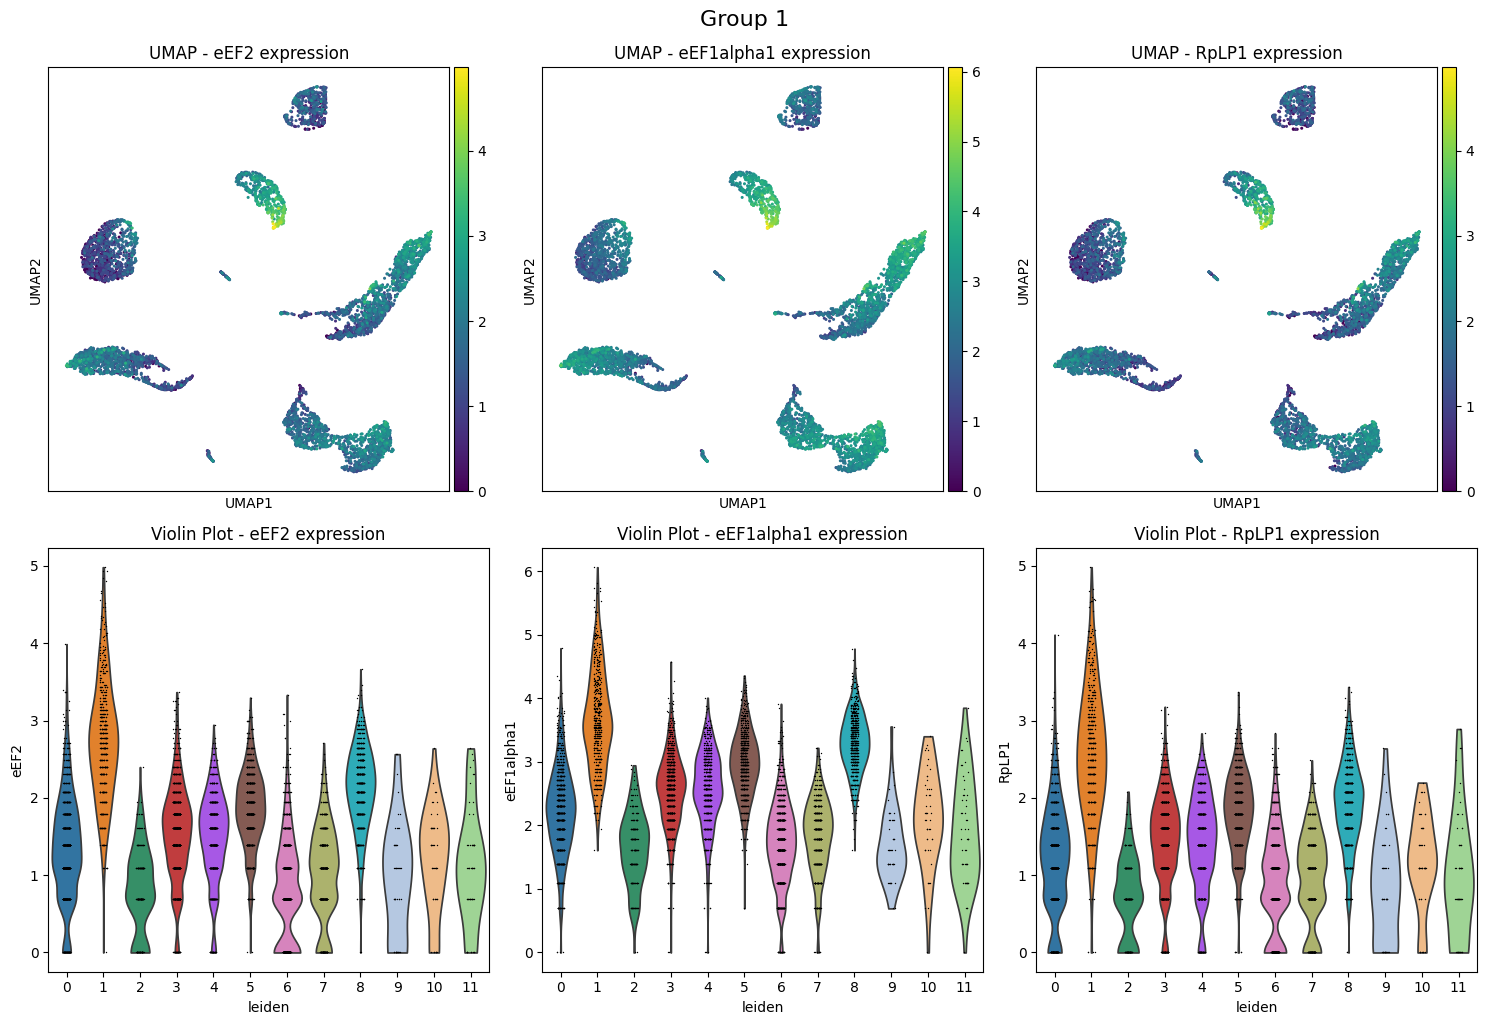

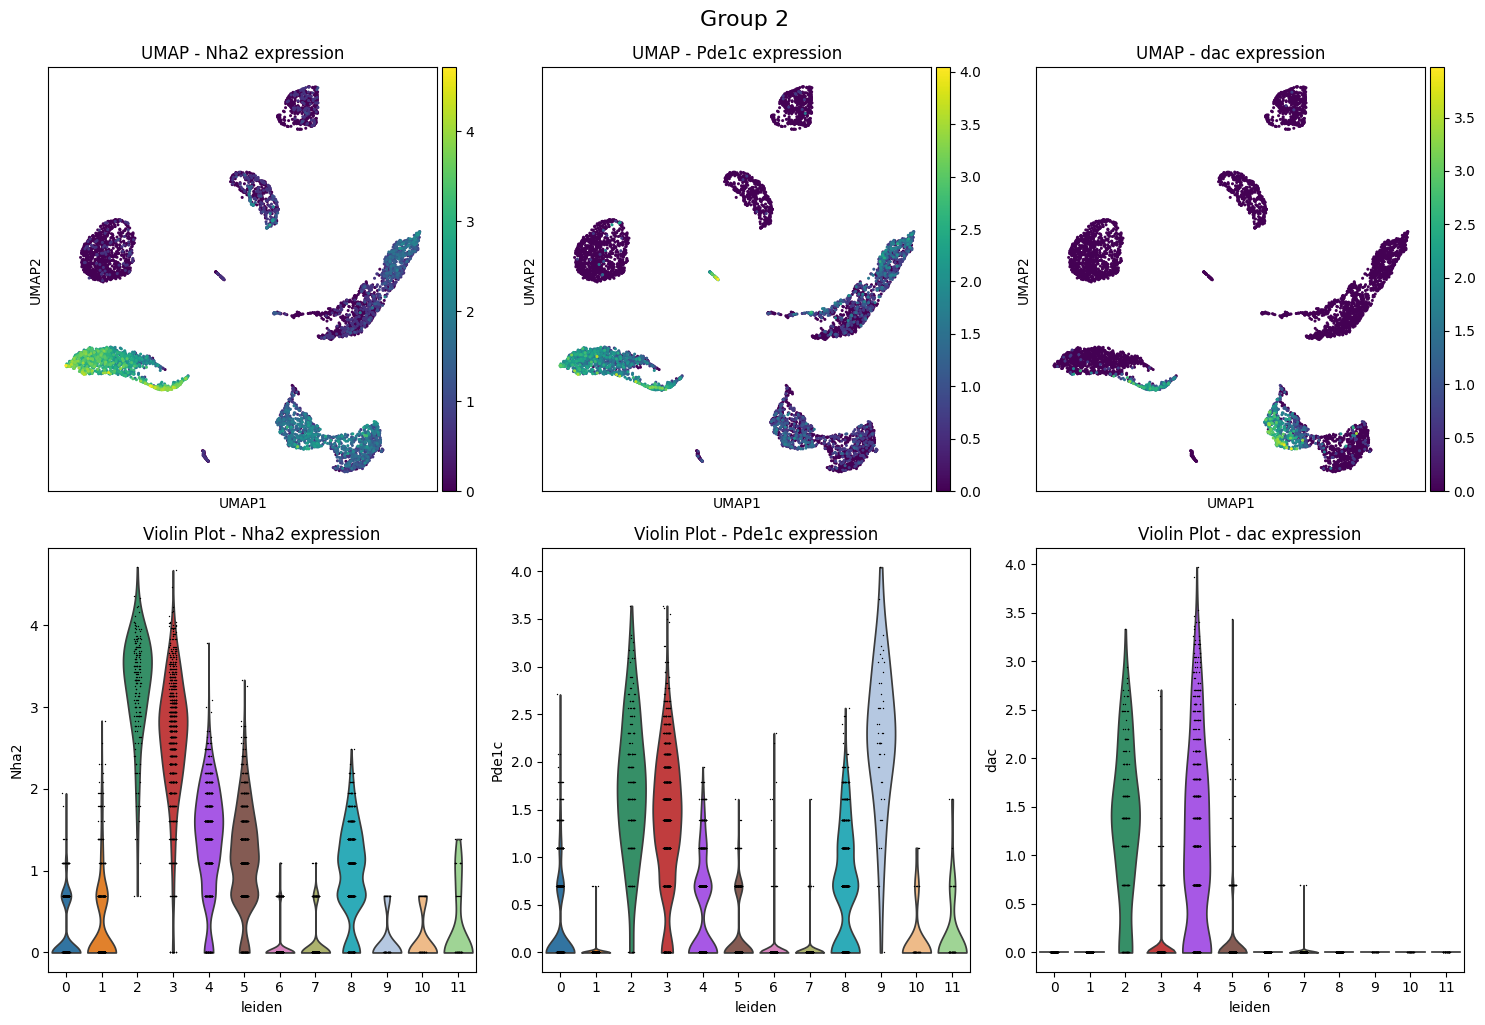

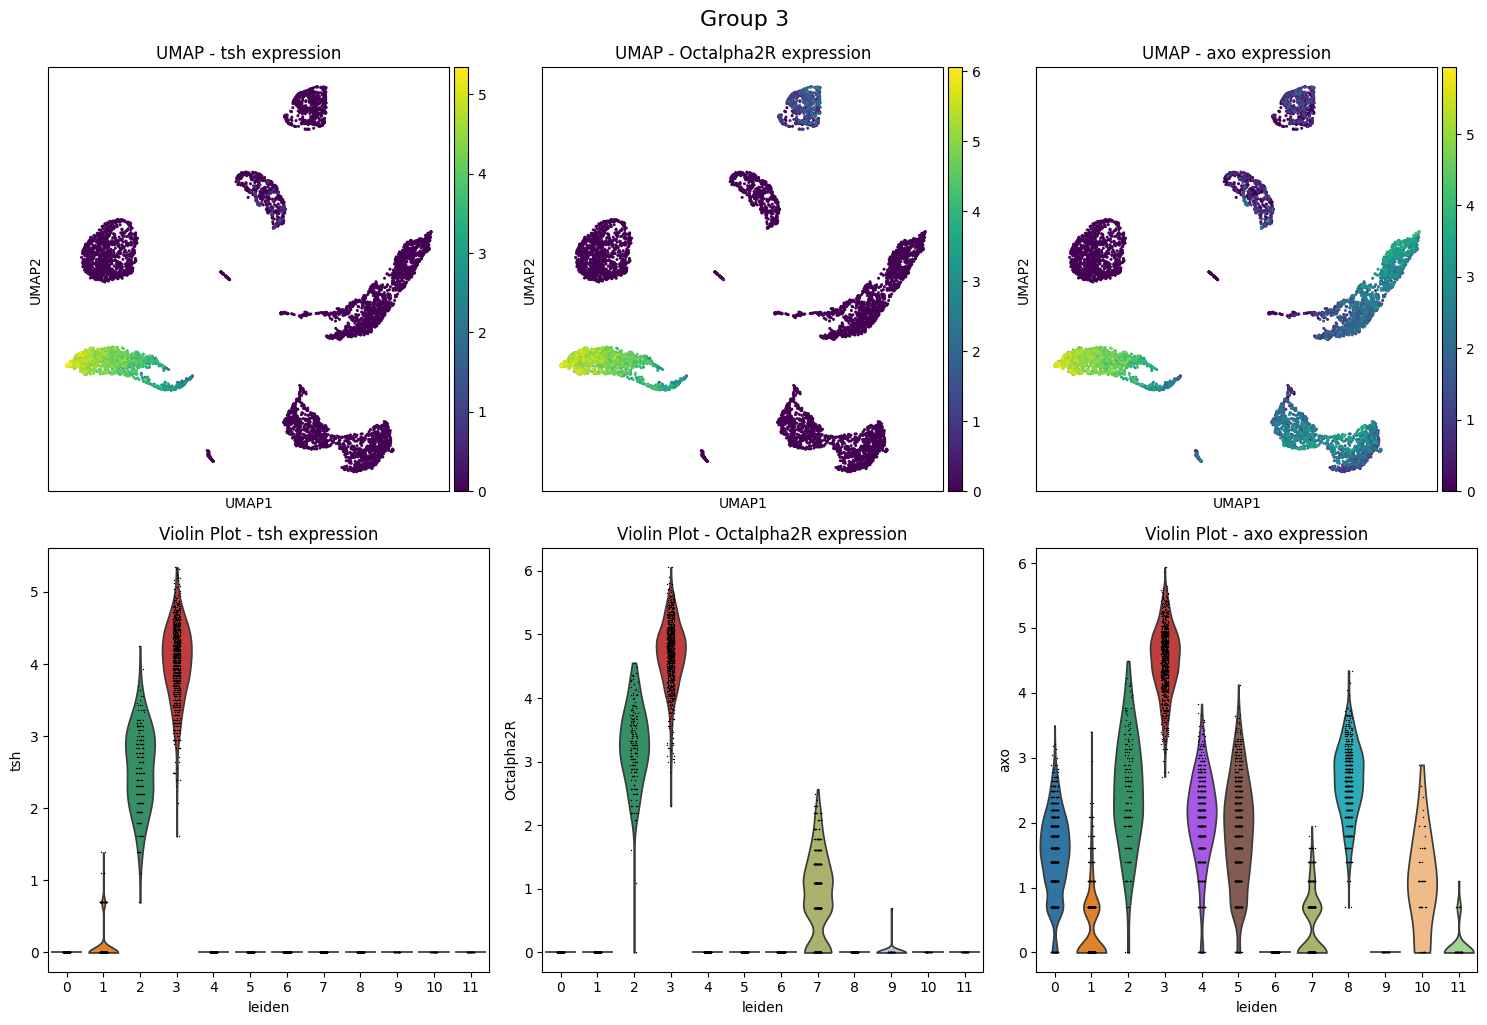

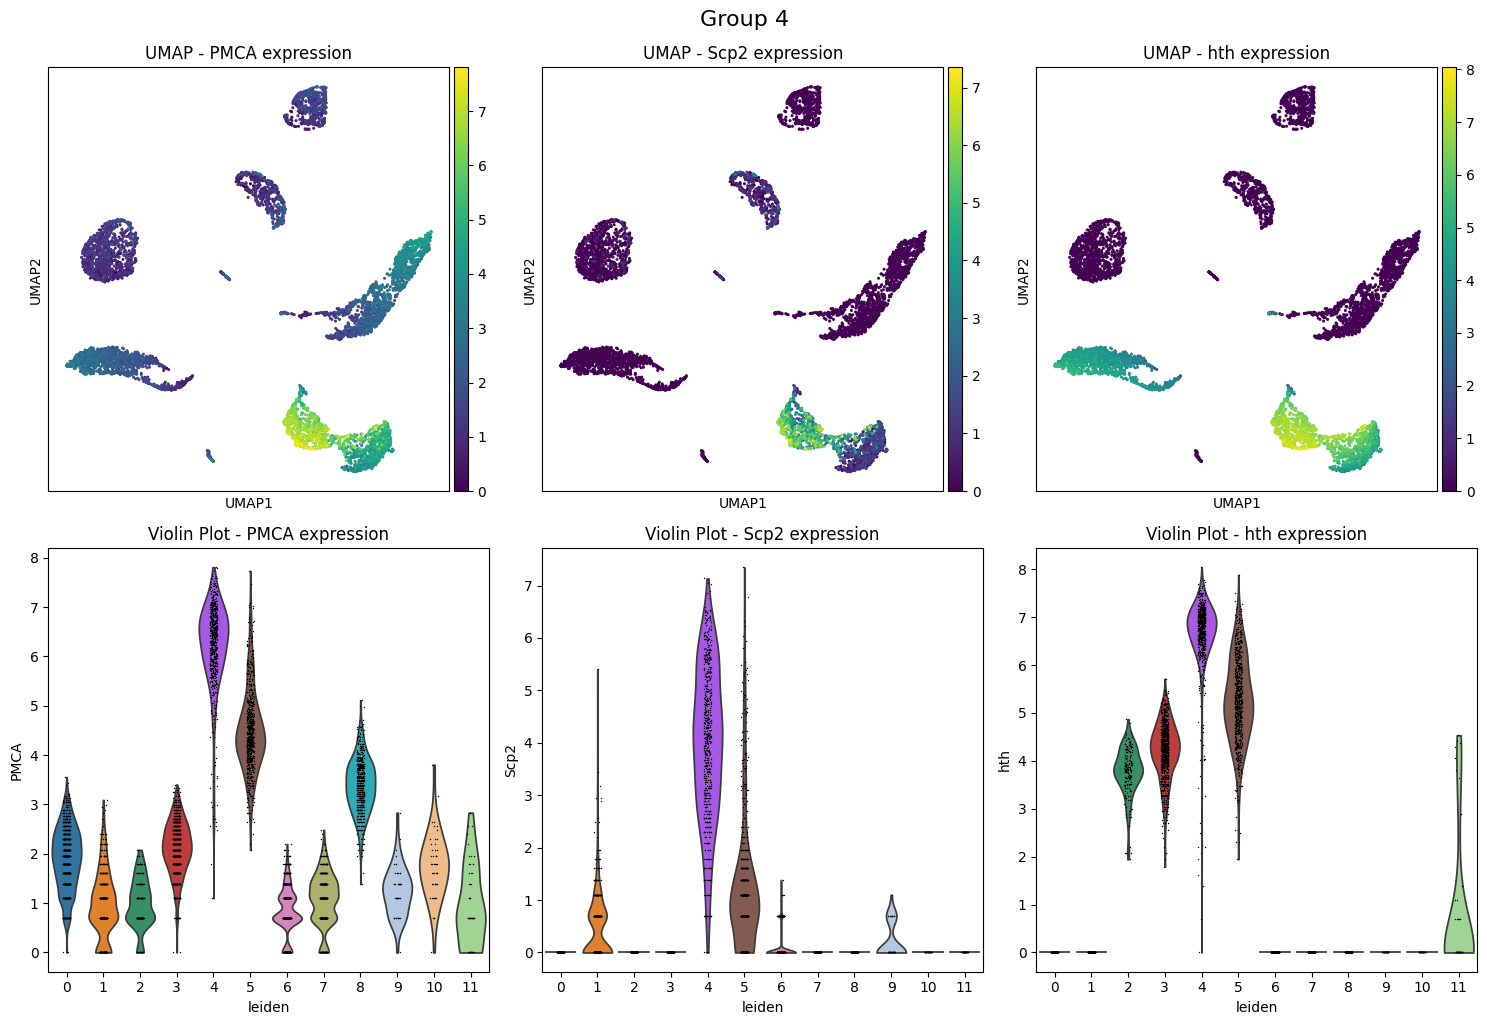

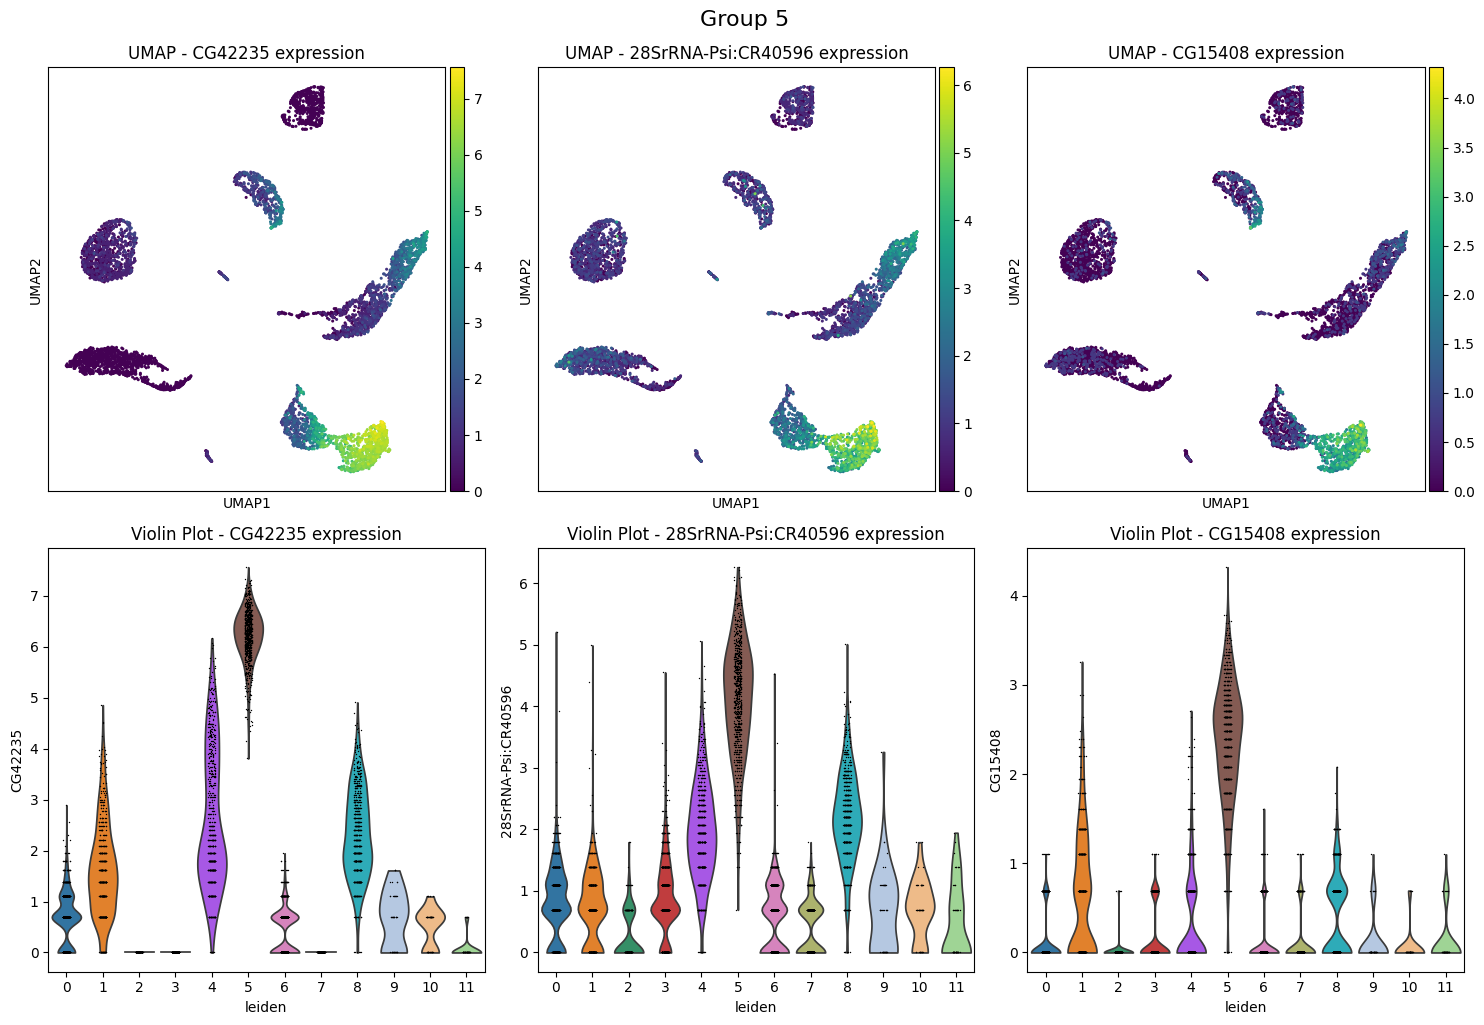

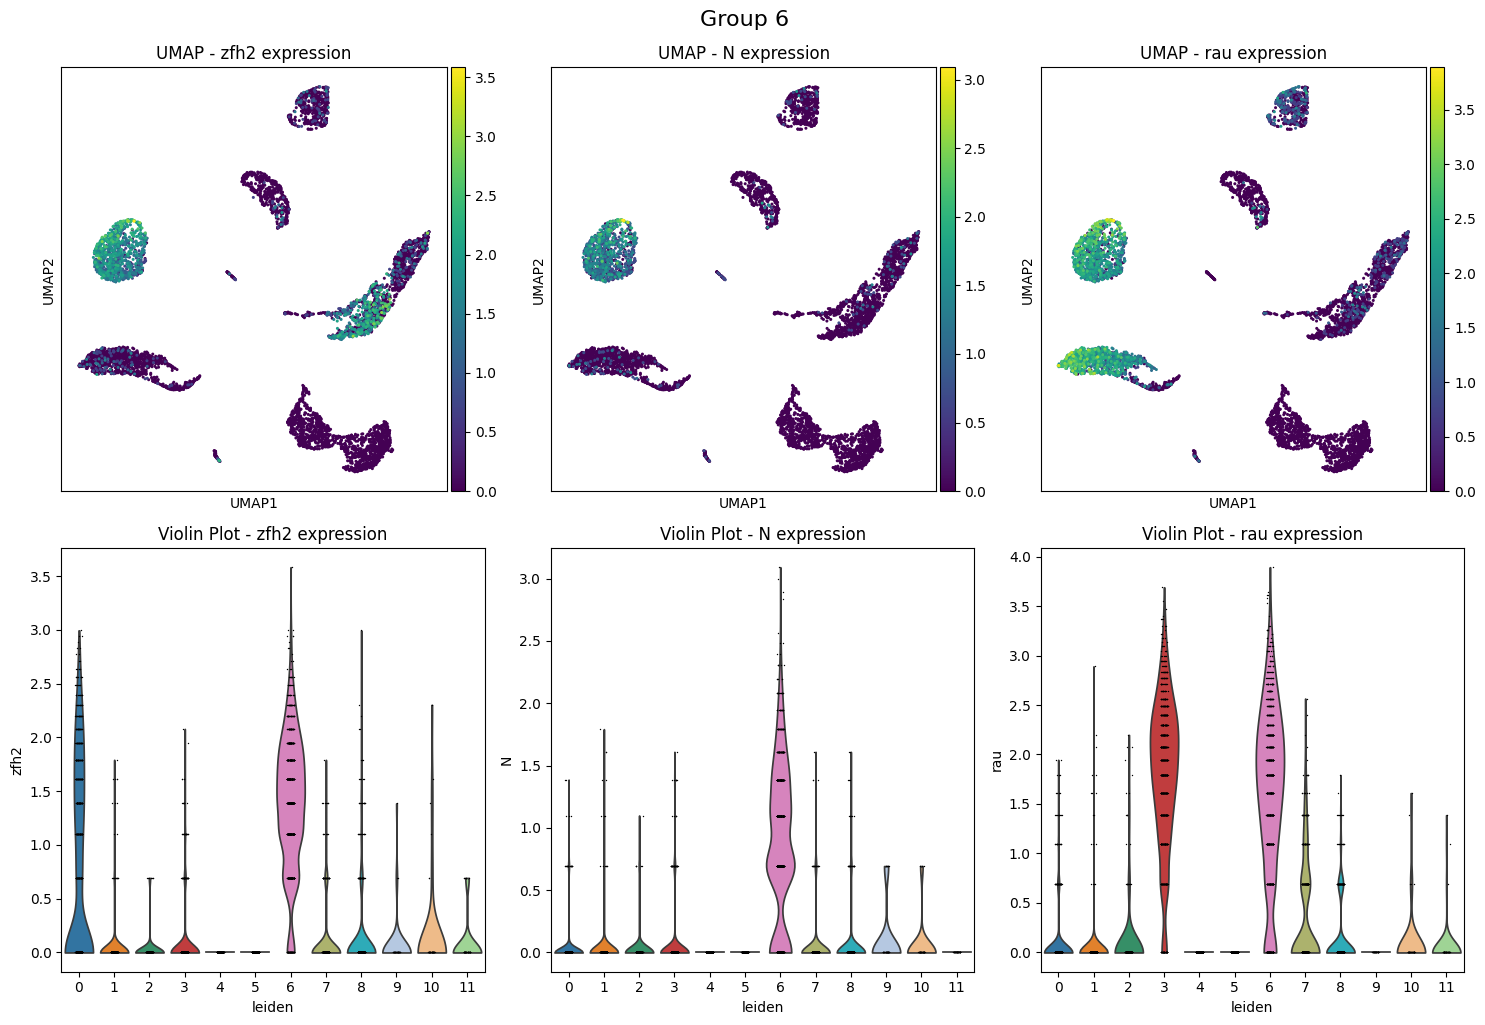

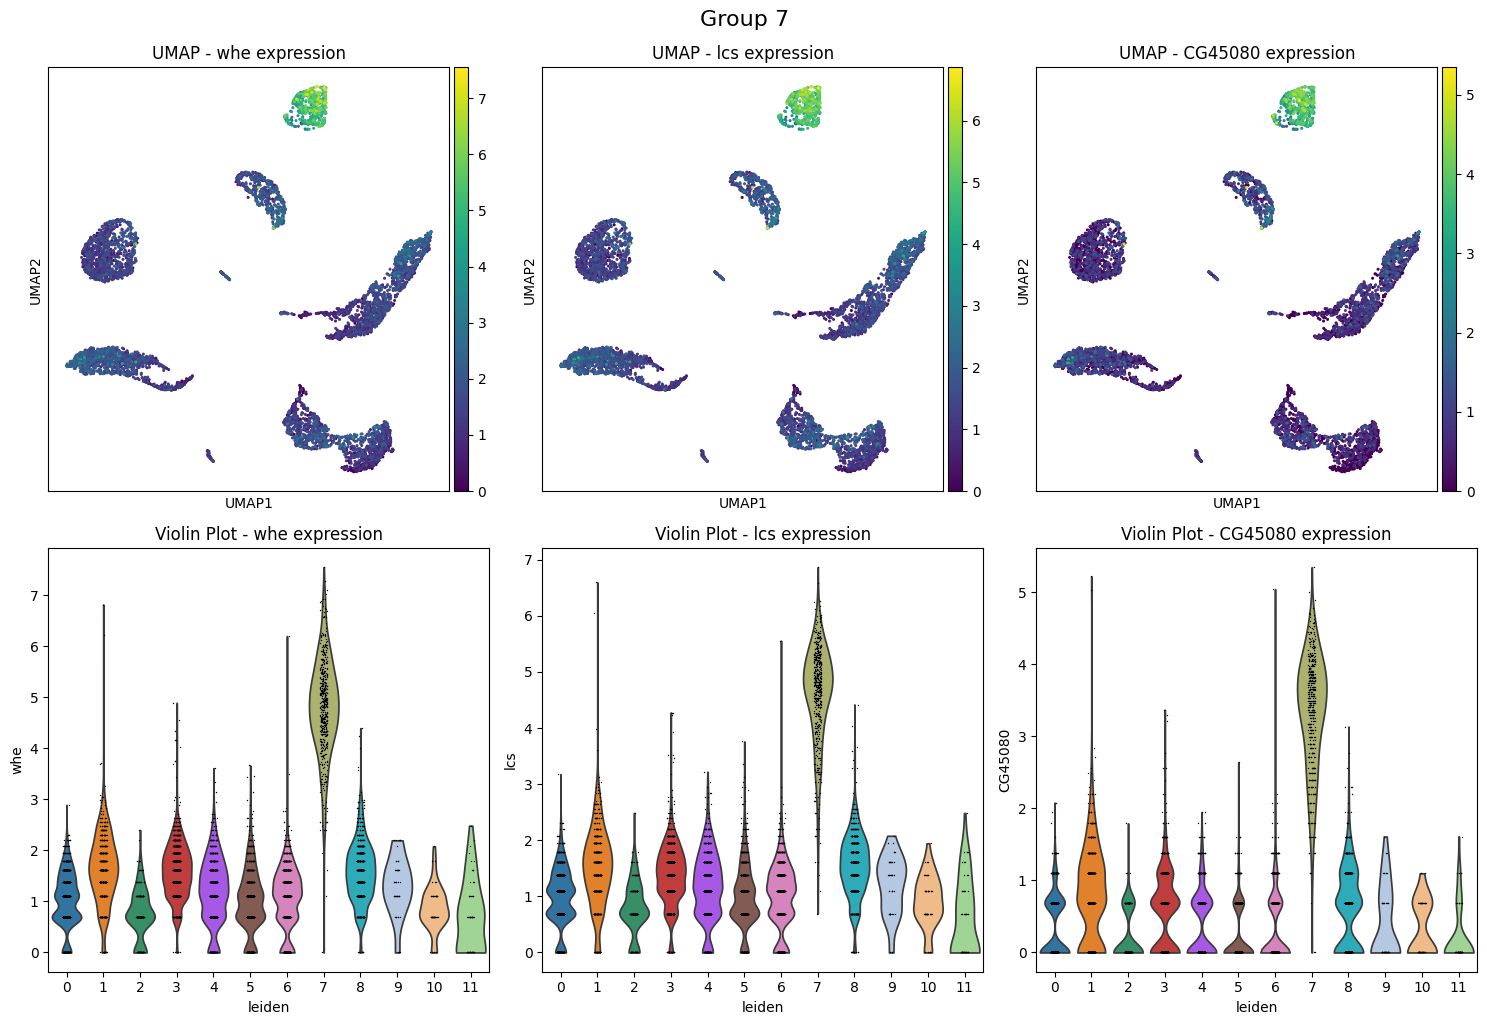

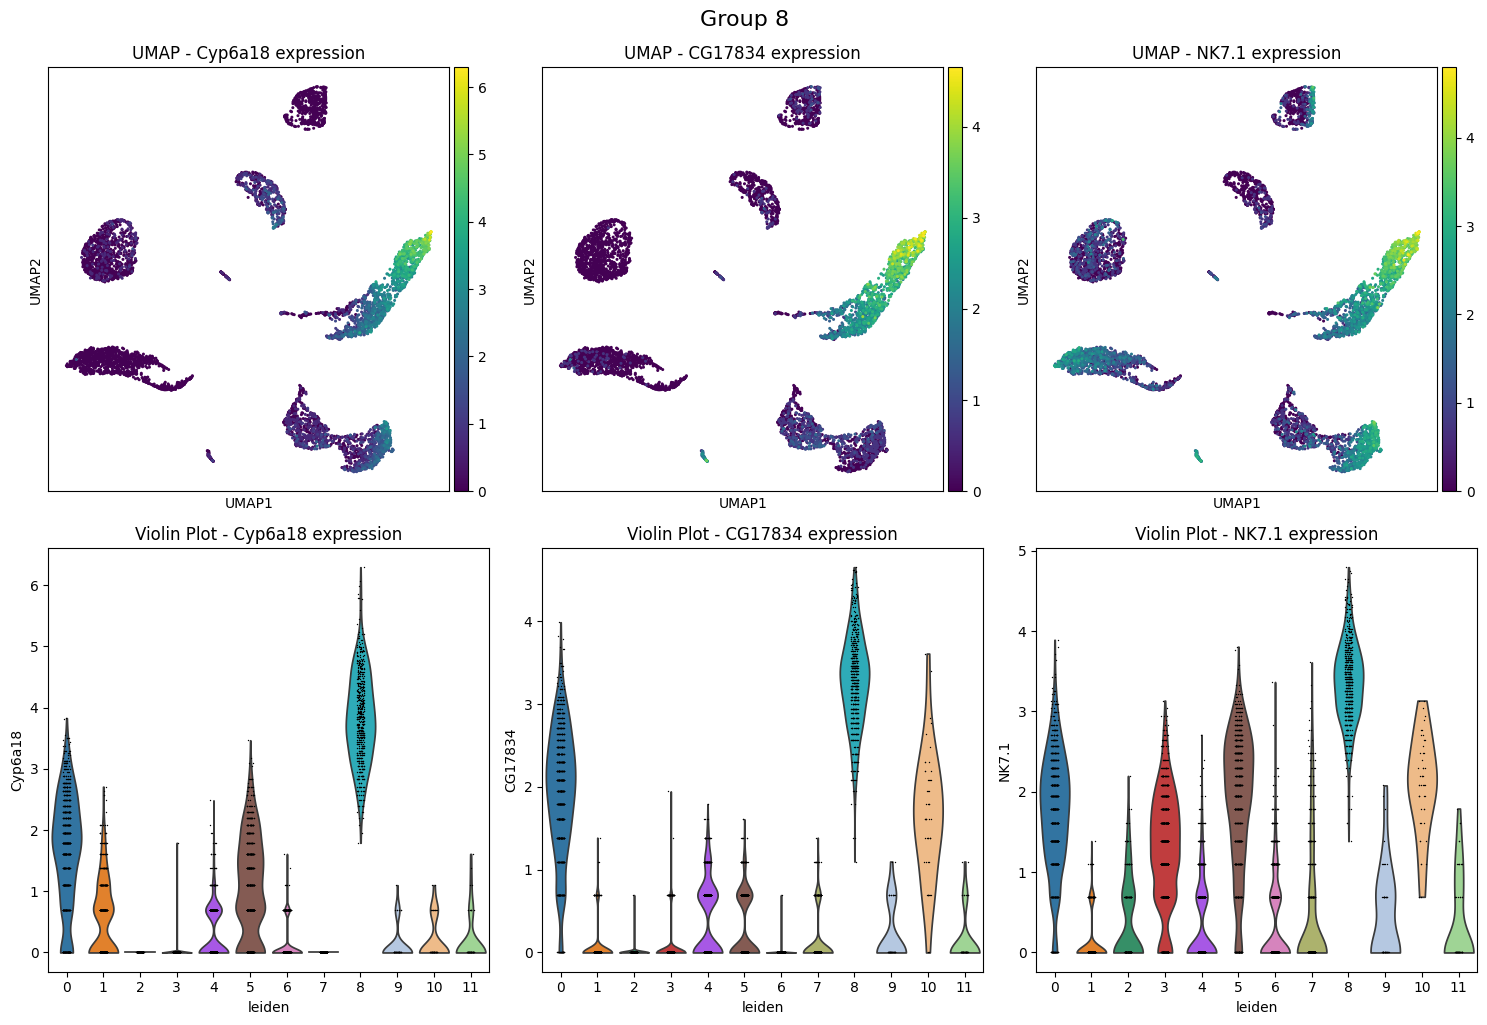

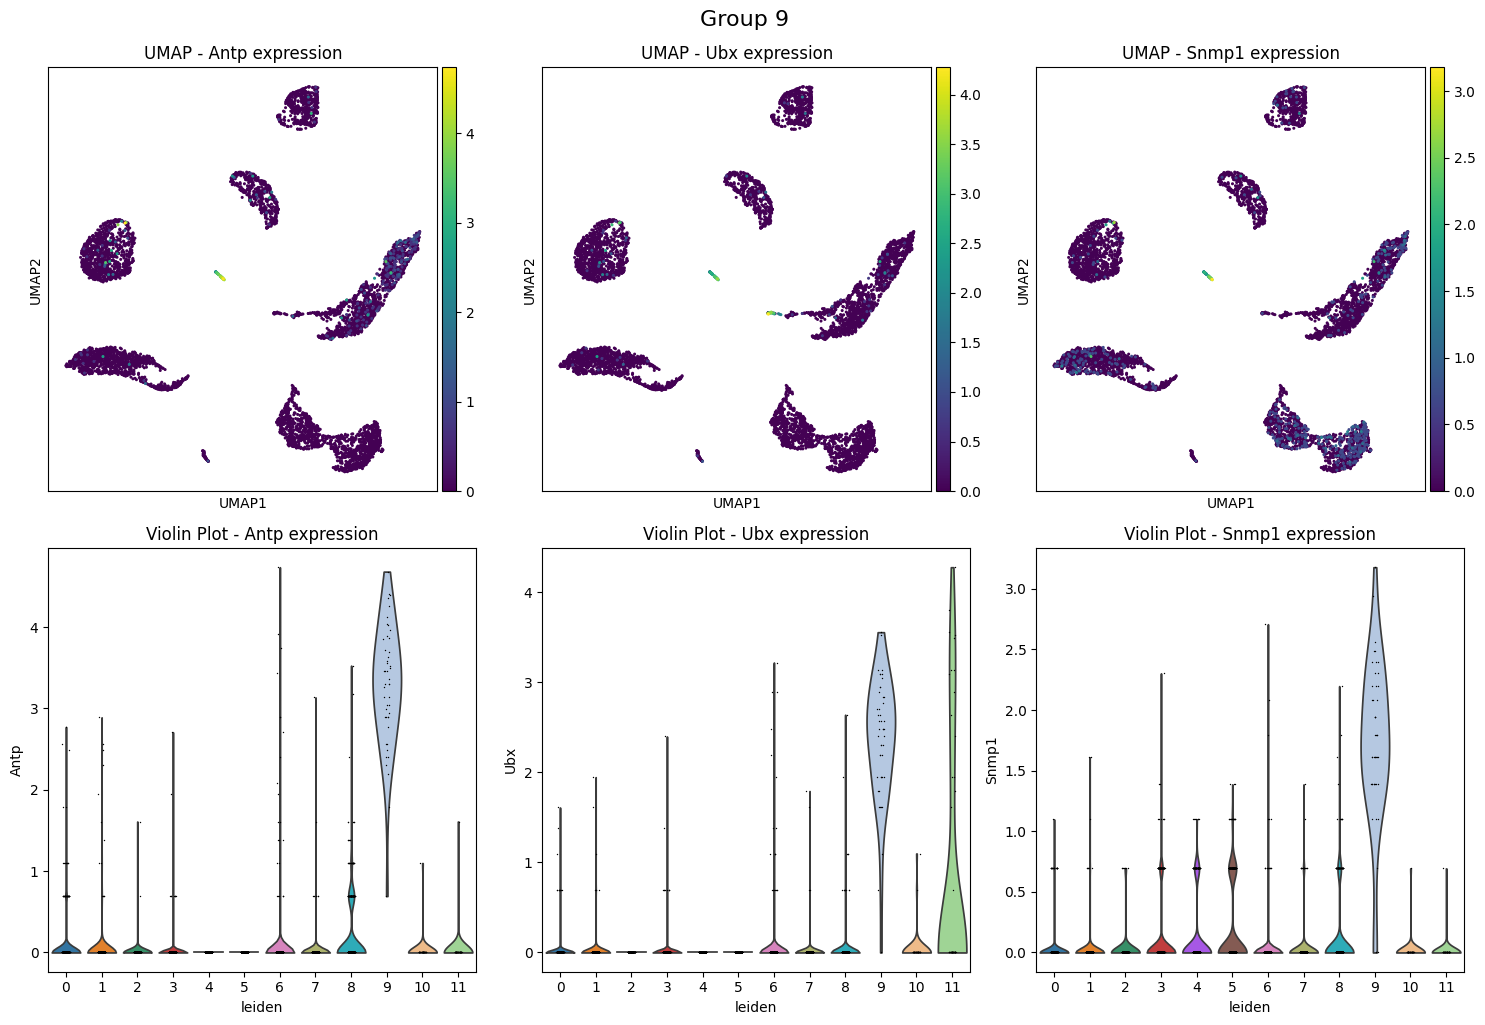

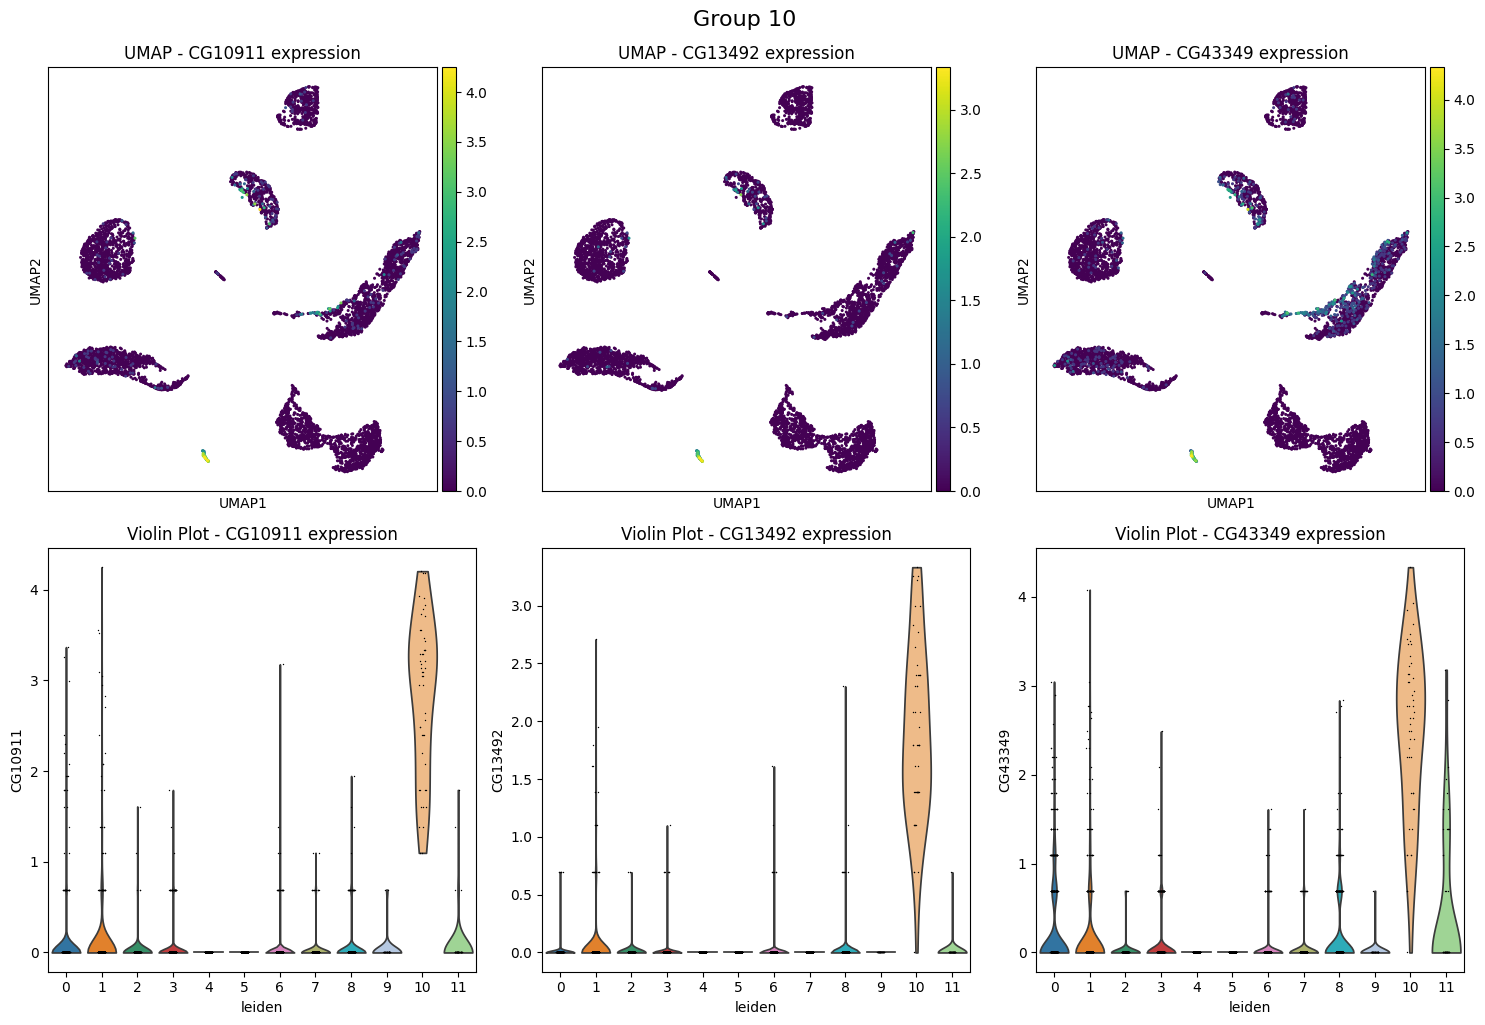

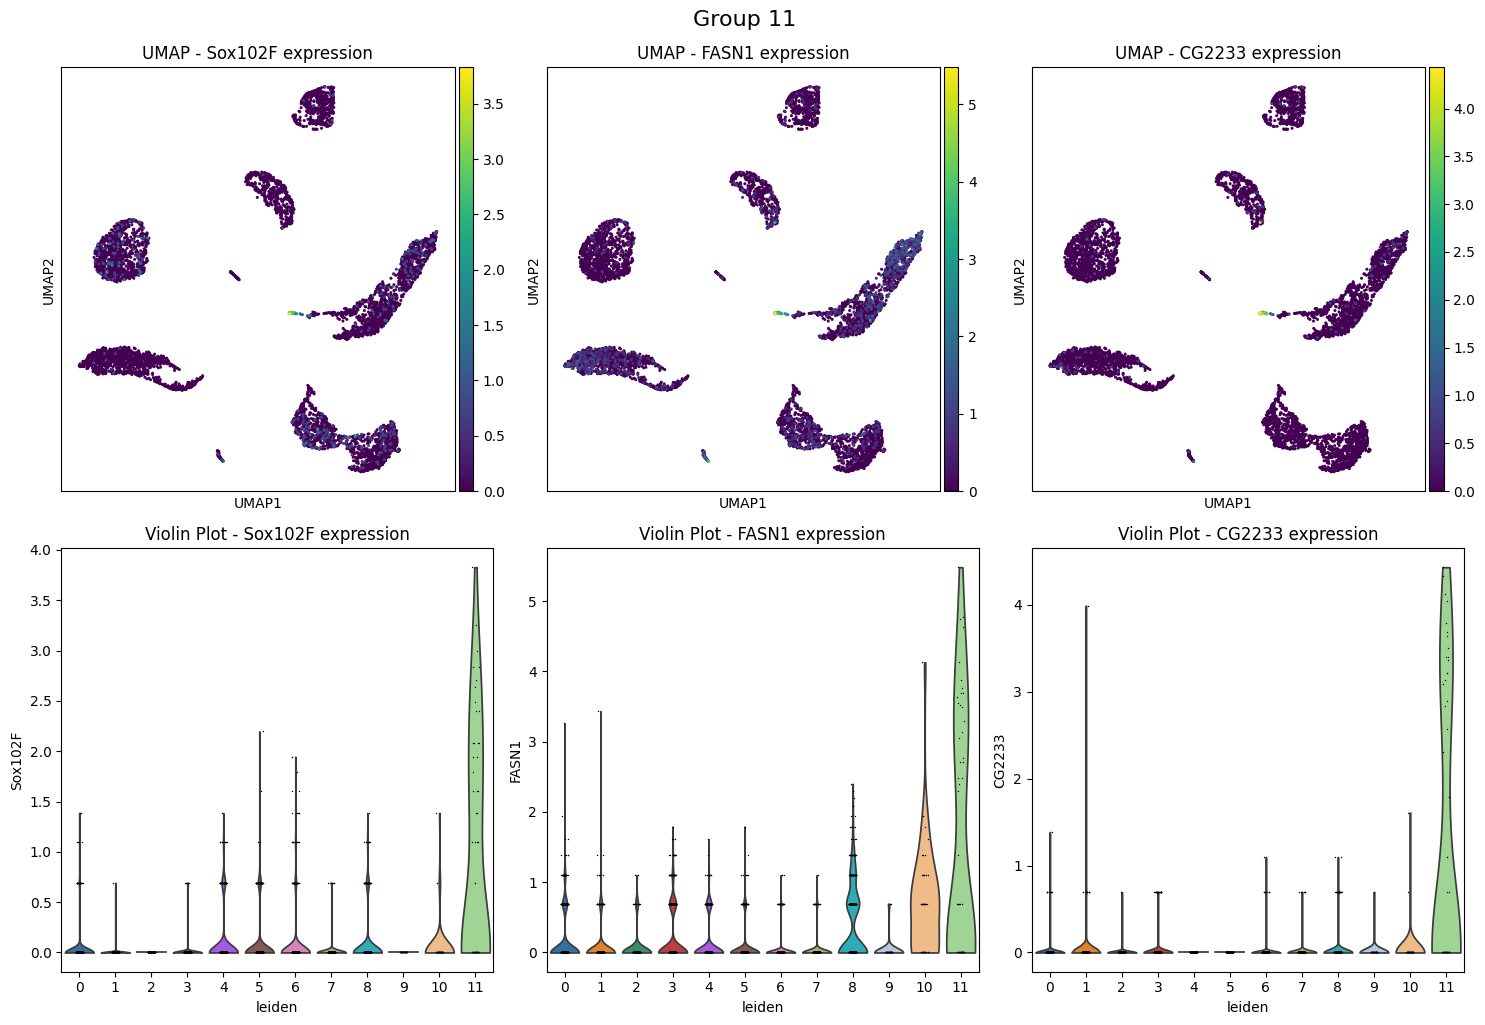

In [7]:
groups = data.obs["leiden"].cat.categories

top_genes = {}

for group in groups:
    #genes for group
    df = sc.get.rank_genes_groups_df(data, group)
    
    top_genes_group = df["names"].head(3).tolist()
    top_genes[group] = top_genes_group

for group in groups:
    top_genes_group = top_genes[group] #top gene

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  #2 rows, 3 columns for better spacing
    axes = axes.flatten() #easy iteration

    for i, gene in enumerate(top_genes_group):
        sc.pl.umap(data, color=gene, ax=axes[i], show=False, color_map="viridis")
        axes[i].set_title(f"UMAP - {gene} expression")

        sc.pl.violin(data, keys=gene, groupby="leiden", ax=axes[i + 3], show=False)
        axes[i + 3].set_title(f"Violin Plot - {gene} expression")

    plt.tight_layout()
    plt.suptitle(f"Group {group}", fontsize=16, y=1.02)
    plt.show()
